# Game: Bagels Deduction

## 1. Rules

Bagels is a deduction game in which the player tries to guess a random three-digit number (with no repeating digits) generated by the computer.
After each guess, the computer gives the player three types of clues.
- Bagels: None of the three digits guessed is in the secret number.
- Pico: One of the digits is in the secret number, but the guess has the digit in the wrong place.
- Fermi: The guess has a correct digit in the correct place.

The computer can give mutliple clues, which are sorted in alphabetical order. If the secret number is "456" and the player's guess is 546, the clues would be "fermi pico pico". The "fermi" is from the "6" and the "pico pico" from the "4" and "5".

## 2. Flowchart

In [1]:
from graphviz import Digraph

In [2]:
dot = Digraph(comment='Bagels Flowchart')

dot.node('START', 'START', shape='oval', style='filled', fillcolor='grey')
dot.node('Generate Secret Number', 'Generate \n Secret Number')
dot.node('Check if run out of guesses', 'Check if run \n out of guesses')

player_loses = Digraph('Player loses', node_attr={'shape': 'doublecircle', 'color': 'red', 'style': 'filled', 'fillcolor': 'white'})
player_loses.node('Lose','Lose')
dot.subgraph(player_loses)

dot.node('Ask for guess', 'Ask for guess')
dot.node('Compare guess with Secret Number', 'Compare guess \n with Secret Number')

player_wins = Digraph('Player wins', node_attr={'shape': 'doublecircle', 'color': 'green', 'style': 'filled', 'fillcolor': 'white'})
player_wins.node('Win','Win')
dot.subgraph(player_wins)

dot.node('Print clues', 'Print clues')
dot.node('Increment Guess Taken count', 'Increment Guess \n Taken count')

dot.node('Play Again?', 'Play Again?')
dot.node('END', 'END', shape='oval', style='filled', fillcolor='grey')

In [3]:
dot.edge('START', 'Generate Secret Number')
dot.edge('Generate Secret Number', 'Check if run out of guesses')

dot.edge('Check if run out of guesses', 'Lose', label='Guess Taken \n> MaxGuess')
dot.edge("Lose", 'Play Again?')

dot.edge('Check if run out of guesses', 'Ask for guess', label='Guess Taken \n=< MaxGuess')
dot.edge('Ask for guess', 'Compare guess with Secret Number')

dot.edge('Compare guess with Secret Number', 'Win', label='Guess == Secret Number')
dot.edge("Win", 'Play Again?')

dot.edge('Compare guess with Secret Number', 'Print clues', label='Guess \n!= Secret Number')
dot.edge('Print clues', 'Increment Guess Taken count')
dot.edge('Increment Guess Taken count', 'Check if run out of guesses')   
    
dot.edge('Play Again?', "Generate Secret Number", label='Yes')
dot.edge('Play Again?', 'END', label='No')

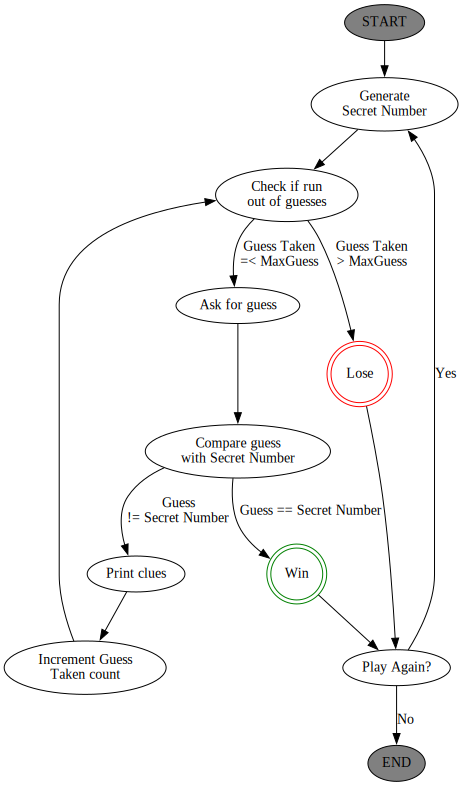

In [4]:
dot

## 3. Program

In [5]:
import random
NUM_DIGITS = 3
MAX_GUESS = 10

In [6]:
# Function returns a string of unique random digits that is NUM_DIGITS long.
def getSecretNum():
    # This method prevents duplicate digits
    numbers = list(range(10))
    random.shuffle(numbers)
    secretNum = ''
    for i in range(NUM_DIGITS):
        # This is an augmented assignment operator, same as secretNum = secretNum + str(numbers[i])
        secretNum += str(numbers[i])
    return secretNum

In [7]:
# Function returns string with the Pico, Fermi, & Bagels clues to the user.
def getClues(guess, secretNum):
    if guess == secretNum:
        return 'You got it!'

    clues = []
    for i in range(len(guess)):
        if guess[i] == secretNum[i]:
            clues.append('Fermi')
        elif guess[i] in secretNum:
            clues.append('Pico')
    if len(clues) == 0:
        return 'Bagels'

    clues.sort()
    # The ' '.join() returns ht list of string with a space appearing between each list element.
    # We could have replaced the space " " with a comma ", ".
    return ' '.join(clues)

In [8]:
# Function returns True if num is a string of only digits. Otherwise, returns False.
def isOnlyDigits(num): 
    if num == '':
        return False

    for i in num:
        if i not in '0 1 2 3 4 5 6 7 8 9'.split():
            return False

    return True

In [9]:
print('I am thinking of a %s-digit number. Try to guess what it is.' % (NUM_DIGITS))
print('The clues I give are...')
print('When I say:    That means:')
print('  Bagels       None of the digits is correct.')
print('  Pico         One digit is correct but in the wrong position.')
print('  Fermi        One digit is correct and in the right position.')

while True:
    secretNum = getSecretNum()
    print('I have thought up a number. You have %s guesses to get it.' % (MAX_GUESS))

    guessesTaken = 1
    while guessesTaken <= MAX_GUESS:
        guess = ''
        while len(guess) != NUM_DIGITS or not isOnlyDigits(guess):
            print('Guess #%s: ' % (guessesTaken))
            guess = input()

        print(getClues(guess, secretNum))
        guessesTaken += 1

        if guess == secretNum:
            break
        if guessesTaken > MAX_GUESS:
            print('You ran out of guesses. The answer was %s.' % (secretNum))

    print('Do you want to play again? (yes or no)')
    if not input().lower().startswith('y'):
        break

I am thinking of a 3-digit number. Try to guess what it is.
The clues I give are...
When I say:    That means:
  Bagels       None of the digits is correct.
  Pico         One digit is correct but in the wrong position.
  Fermi        One digit is correct and in the right position.
I have thought up a number. You have 10 guesses to get it.
Guess #1: 


 789


Fermi
Guess #2: 


 456


Fermi
Guess #3: 


 123


Bagels
Guess #4: 


 678


Bagels
Guess #5: 


 954


Pico Pico
Guess #6: 


 409


You got it!
Do you want to play again? (yes or no)


 no


## 4. Notes

### 4.1 String interpolation or String formatting

Normally, if you want to use the string values inside variables in another string, you have to use the + concatenation operator which is time-consuming:

In [10]:
name = 'Alice'
event = 'party'
location = 'the pool'
day = 'Saturday'
time = '6:00pm'

In [11]:
print('Hello, ' + name + '. Will you go to the ' + event + ' at ' + 
      location + ' this ' + day + ' at ' + time + '?')

Hello, Alice. Will you go to the party at the pool this Saturday at 6:00pm?


Instead, you can put placeholders called conversion specifiers into the string '%s'
Once you’ve put in the conversion specifiers, you can put all the variable names at the end of the string. 
Each %s is replaced with a variable at the end of the line, in the order in which you entered the variable.

In [12]:
print('Hello, %s. Will you go to the %s at %s this %s at %s?' % (name,event, location, day, time))

Hello, Alice. Will you go to the party at the pool this Saturday at 6:00pm?
